# DATASET

In [2]:

import pandas as pd

# Load the uploaded dataset
file_path = "D:\EXCELR TRAINING\DATA SCIENCE ASSIGNMENTS (NAVEEN NAGANURI)\CSV FILES OF DATA SCIENCE\CSV FILES OF DATA SCIENCE\Association Rules\Association Rules\Online retail.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to inspect its structure
data.head()


<>:4: SyntaxWarning: invalid escape sequence '\E'
<>:4: SyntaxWarning: invalid escape sequence '\E'
C:\Users\Asus\AppData\Local\Temp\ipykernel_1968\567833197.py:4: SyntaxWarning: invalid escape sequence '\E'
  file_path = "D:\EXCELR TRAINING\DATA SCIENCE ASSIGNMENTS (NAVEEN NAGANURI)\CSV FILES OF DATA SCIENCE\CSV FILES OF DATA SCIENCE\Association Rules\Association Rules\Online retail.xlsx"


,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


# DATA PREPROCESSING

In [5]:
# Convert the dataset into a list of transactions (splitting by comma)
transactions = data.iloc[:, 0].apply(lambda x: x.split(','))

# Display the first few transactions to verify the transformation
transactions.head()


0                           [burgers, meatballs, eggs]
1                                            [chutney]
2                                    [turkey, avocado]
3    [mineral water, milk, energy bar, whole wheat ...
4                                     [low fat yogurt]
Name: shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil, dtype: object

# ASSOCIATION  RULE  MINING

In [8]:
!pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Convert transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm with a minimum support threshold
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules with a minimum confidence level
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Display the generated rules
print(rules)


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 1.4 MB/s eta 0:00:01
   - -------------------------------------- 0.1/1.4 MB 825.8 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.4 MB 563.7 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 655.4 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 535.8 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 535.8 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 379.3 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 379.3 kB/s eta 0:00:04
   ---- ----------------------------------- 0.1/1.4 MB 355.0 kB/s eta 0:00:04
   ----- ------

In [9]:
df_encoded

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#  ANALYSIS AND INTERPRETATION

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
# Display the top 10 rules sorted by highest lift
top_lift_rules = rules.sort_values(by="lift", ascending=False).head(10)
print("Top 10 Rules by Lift:")
print(top_lift_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Display the top 10 rules sorted by highest confidence
top_confidence_rules = rules.sort_values(by="confidence", ascending=False).head(10)
print("\nTop 10 Rules by Confidence:")
print(top_confidence_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Find rules with both high lift and high confidence (e.g., lift > 2, confidence > 0.5)
high_quality_rules = rules[(rules['lift'] > 2) & (rules['confidence'] > 0.5)]
print("\nHigh-Quality Rules (Lift > 2 and Confidence > 0.5):")
print(high_quality_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Analyze specific items (e.g., find rules where 'mineral water' is involved)
mineral_water_rules = rules[rules['antecedents'].apply(lambda x: 'mineral water' in str(x)) | rules['consequents'].apply(lambda x: 'mineral water' in str(x))]

print("\nRules Involving 'Mineral Water':")
print(mineral_water_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top 10 Rules by Lift:
                            antecedents          consequents   support  \
75                      (herb & pepper)        (ground beef)  0.016000   
152          (mineral water, spaghetti)        (ground beef)  0.017067   
69                           (tomatoes)  (frozen vegetables)  0.016133   
67                             (shrimp)  (frozen vegetables)  0.016667   
145               (mineral water, milk)  (frozen vegetables)  0.011067   
153        (mineral water, ground beef)          (spaghetti)  0.017067   
143  (frozen vegetables, mineral water)               (milk)  0.011067   
150               (mineral water, milk)        (ground beef)  0.011067   
90                               (soup)               (milk)  0.015200   
79                          (spaghetti)        (ground beef)  0.039200   

     confidence      lift  
75     0.323450  3.291555  
152    0.285714  2.907540  
69     0.235867  2.474134  
67     0.233645  2.450820  
145    0.230556  2.4184

# VISUALISING ASSOCIATION RULES USING A SCATTER PLOT 

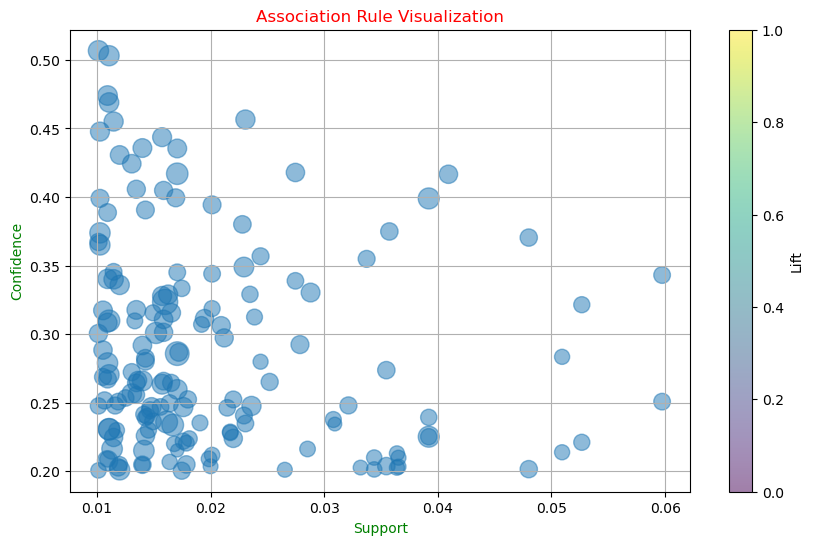

In [14]:
import matplotlib.pyplot as plt

# Assuming 'rules' is your DataFrame containing association rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], s=rules['lift']*100, alpha=0.5)
plt.xlabel('Support',color='green')
plt.ylabel('Confidence',color='green')
plt.title('Association Rule Visualization',color='red')
plt.colorbar(label='Lift')
plt.grid(True)
plt.show()

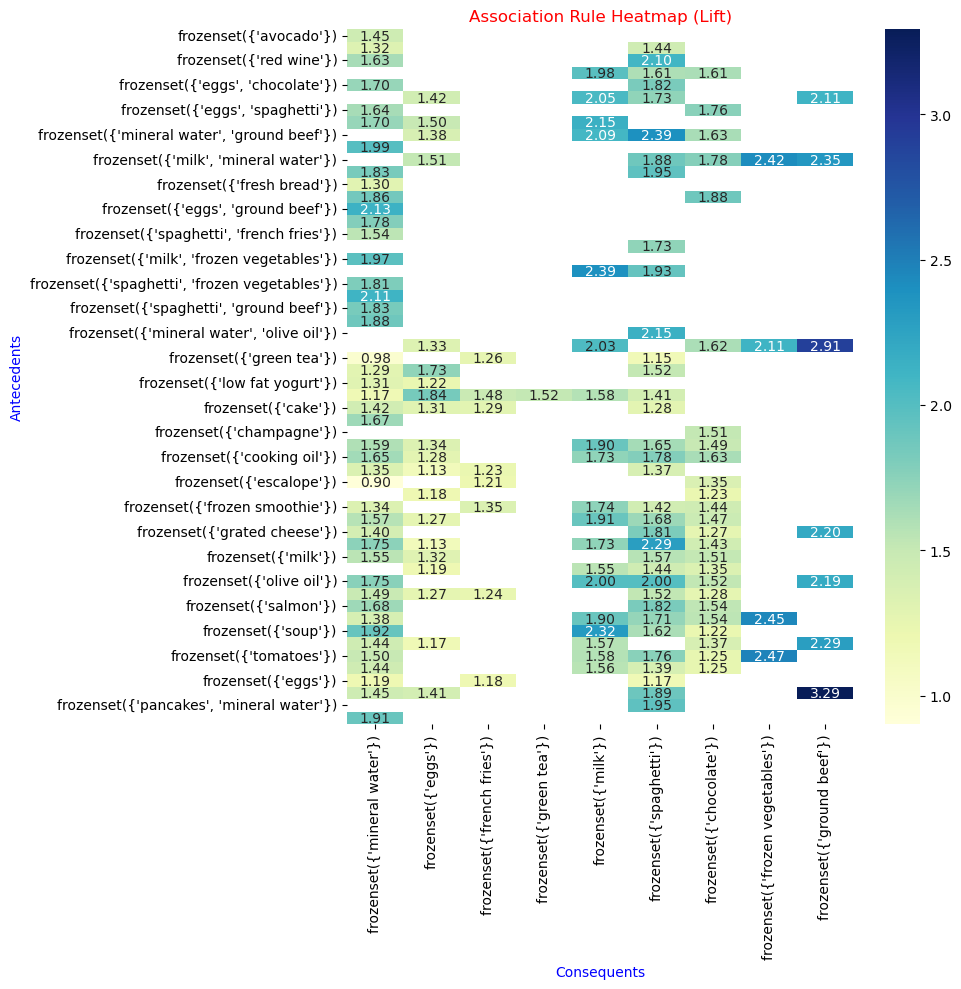

In [16]:
#Heatmap visualization for association rules using the seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'rules' is your DataFrame containing association rules
# Create a pivot table for the heatmap
pivot_table = rules.pivot(index='antecedents', columns='consequents', values='lift')

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Association Rule Heatmap (Lift)',color='red')
plt.xlabel('Consequents',color='blue')
plt.ylabel('Antecedents',color='blue')
plt.tight_layout()
plt.show()

# **Interview Questions**

**1.What is lift and why is it important in Association rules?**

Ans:Lift measures the strength of a rule by comparing its confidence to its expected confidence.

**Formula:**
Lift = (Confidence / (Support of consequent))

**Why is Lift Important?**

Identifies interesting rules
Distinguishes between strong and weak rules


---



**2.What is support and Confidence. How do you calculate them?**

**Support:** Support measures the frequency of a rule in the dataset. It represents the proportion of transactions in the dataset that contain the itemset.

**Confidence:** Confidence measures the reliability of a rule. It represents the proportion of transactions that contain the consequent (right-hand side) among those that contain the antecedent (left-hand side).

**How to Calculate Support and Confidence:**

Let's consider a rule: A => B

**Support (sup): sup(A => B**) = Number of transactions containing both A and B / Total number of transactions

**Confidence (conf): conf(A => B)** = Number of transactions containing both A and B / Number of transactions containing A


---



**3.What are some limitations or challenges of Association rules mining?**

**Main Limitations and Challenges of Association Rules Mining:**

**1. Handling Large Datasets:** Association rules mining can be computationally expensive and may not be suitable for very large datasets.

**2. Noise and Missing Values:** Noise and missing values in the data can lead to inaccurate or misleading rules.

**3. Overfitting:** Generating too many rules can lead to overfitting, making it difficult to identify meaningful patterns.

These three limitations are some of the most significant challenges in association rules mining, and addressing them is crucial to obtaining accurate and meaningful results.


---


